# Step 1: Import necessary libraries

In [17]:
# Step 1: Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Set up plotting style to make graphs look better
plt.style.use('default')
%matplotlib inline

## Step 2: Loading and Understanding the Data

In [18]:
# First, let's load the dataset
# I need to handle the encoding error from earlier
try:
    df = pd.read_csv('Superstore.csv', encoding='utf-8')
    print("Loaded with UTF-8 encoding")
except:
    try:
        df = pd.read_csv('Superstore.csv', encoding='latin-1')
        print("Loaded with Latin-1 encoding")
    except:
        df = pd.read_csv('Superstore.csv', encoding='iso-8859-1')
        print("Loaded with ISO-8859-1 encoding")

# Let's see what we have
print("Dataset shape:", df.shape)
print("\nFirst look at the data:")
df.head()

Loaded with Latin-1 encoding
Dataset shape: (9994, 21)

First look at the data:


Row ID        Order ID  Order Date   Ship Date       Ship Mode Customer ID  \
0       1  CA-2016-152156   11/8/2016  11/11/2016    Second Class    CG-12520   
1       2  CA-2016-152156   11/8/2016  11/11/2016    Second Class    CG-12520   
2       3  CA-2016-138688   6/12/2016   6/16/2016    Second Class    DV-13045   
3       4  US-2015-108966  10/11/2015  10/18/2015  Standard Class    SO-20335   
4       5  US-2015-108966  10/11/2015  10/18/2015  Standard Class    SO-20335   

     Customer Name    Segment        Country             City  ...  \
0      Claire Gute   Consumer  United States        Henderson  ...   
1      Claire Gute   Consumer  United States        Henderson  ...   
2  Darrin Van Huff  Corporate  United States      Los Angeles  ...   
3   Sean O'Donnell   Consumer  United States  Fort Lauderdale  ...   
4   Sean O'Donnell   Consumer  United States  Fort Lauderdale  ...   

  Postal Code  Region       Product ID         Category Sub-Category  \
0       42420   South  FUR-BO-10001798        Furniture    Bookcases   
1       42420   South  FUR-CH-10000454        Furniture       Chairs   
2       90036    West  OFF-LA-10000240  Office Supplies       Labels   
3       33311   South  FUR-TA-10000577        Furniture       Tables   
4       33311   South  OFF-ST-10000760  Office Supplies      Storage   

                                        Product Name     Sales  Quantity  \
0                  Bush Somerset Collection Bookcase  261.9600         2   
1  Hon Deluxe Fabric Upholstered Stacking Chairs,...  731.9400         3   
2  Self-Adhesive Address Labels for Typewriters b...   14.6200         2   
3      Bretford CR4500 Series Slim Rectangular Table  957.5775         5   
4                     Eldon Fold 'N Roll Cart System   22.3680         2   

   Discount    Profit  
0      0.00   41.9136  
1      0.00  219.5820  
2      0.00    6.8714  
3      0.45 -383.0310  
4      0.20    2.5164  

[5 rows x 21 columns]

In [20]:
# Let me see all the column names properly
print("All columns in the dataset:")
for i, col in enumerate(df.columns, 1):
    print(f"{i}. {col}")

All columns in the dataset:
1. Row ID
2. Order ID
3. Order Date
4. Ship Date
5. Ship Mode
6. Customer ID
7. Customer Name
8. Segment
9. Country
10. City
11. State
12. Postal Code
13. Region
14. Product ID
15. Category
16. Sub-Category
17. Product Name
18. Sales
19. Quantity
20. Discount
21. Profit


## Step 3: Checking for Missing Data

In [21]:
# Checking for missing values
missing_data = df.isnull().sum()
print("Missing values in each column:")
print(missing_data)

# Let me calculate the percentage of missing values too
total_cells = np.product(df.shape)
total_missing = missing_data.sum()
print(f"\nTotal missing values: {total_missing}")
print(f"Percentage of missing data: {(total_missing/total_cells)*100:.4f}%")

Missing values in each column:
Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64


AttributeError: module 'numpy' has no attribute 'product'

## Checking Duplicates

In [22]:
duplicates = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")

Number of duplicate rows: 0


In [23]:
## Step 4: Understanding the Data Structure

In [24]:
print("Basic statistics for numerical columns:")
df.describe()

Basic statistics for numerical columns:


Row ID   Postal Code         Sales     Quantity     Discount  \
count  9994.000000   9994.000000   9994.000000  9994.000000  9994.000000   
mean   4997.500000  55190.379428    229.858001     3.789574     0.156203   
std    2885.163629  32063.693350    623.245101     2.225110     0.206452   
min       1.000000   1040.000000      0.444000     1.000000     0.000000   
25%    2499.250000  23223.000000     17.280000     2.000000     0.000000   
50%    4997.500000  56430.500000     54.490000     3.000000     0.200000   
75%    7495.750000  90008.000000    209.940000     5.000000     0.200000   
max    9994.000000  99301.000000  22638.480000    14.000000     0.800000   

            Profit  
count  9994.000000  
mean     28.656896  
std     234.260108  
min   -6599.978000  
25%       1.728750  
50%       8.666500  
75%      29.364000  
max    8399.976000

In [25]:

categorical_cols = df.select_dtypes(include=['object']).columns
print("Categorical columns:")
print(categorical_cols)

print("\nUnique values in categorical columns:")
for col in categorical_cols:
    if df[col].nunique() < 20:  # Only show if not too many unique values
        print(f"{col}: {df[col].nunique()} unique values - {list(df[col].unique())}")

Categorical columns:
Index(['Order ID', 'Order Date', 'Ship Date', 'Ship Mode', 'Customer ID',
       'Customer Name', 'Segment', 'Country', 'City', 'State', 'Region',
       'Product ID', 'Category', 'Sub-Category', 'Product Name'],
      dtype='object')

Unique values in categorical columns:
Ship Mode: 4 unique values - ['Second Class', 'Standard Class', 'First Class', 'Same Day']
Segment: 3 unique values - ['Consumer', 'Corporate', 'Home Office']
Country: 1 unique values - ['United States']
Region: 4 unique values - ['South', 'West', 'Central', 'East']
Category: 3 unique values - ['Furniture', 'Office Supplies', 'Technology']
Sub-Category: 17 unique values - ['Bookcases', 'Chairs', 'Labels', 'Tables', 'Storage', 'Furnishings', 'Art', 'Phones', 'Binders', 'Appliances', 'Paper', 'Accessories', 'Envelopes', 'Fasteners', 'Supplies', 'Machines', 'Copiers']


## Step 5: Data Visualization

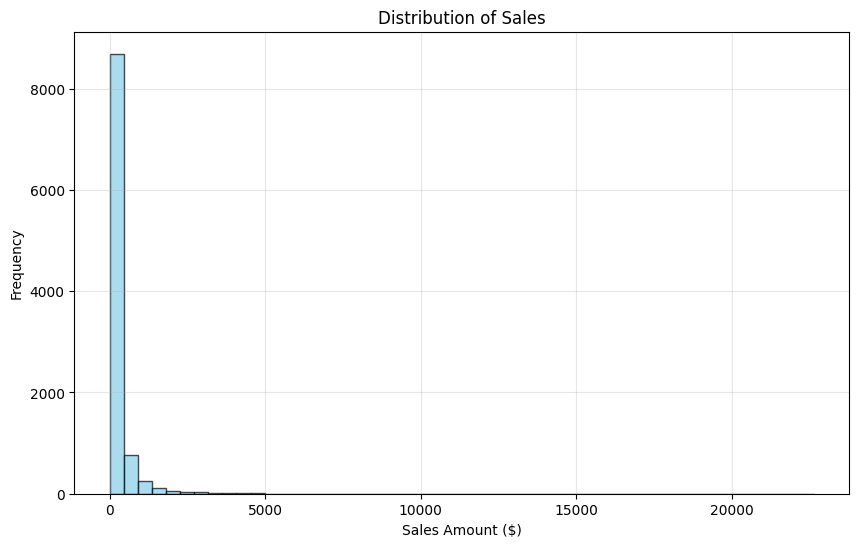

In [26]:
# Let me start with some basic visualizations
# First, let's look at the distribution of Sales
plt.figure(figsize=(10, 6))
plt.hist(df['Sales'], bins=50, alpha=0.7, color='skyblue', edgecolor='black')
plt.title('Distribution of Sales')
plt.xlabel('Sales Amount ($)')
plt.ylabel('Frequency')
plt.grid(alpha=0.3)
plt.show()

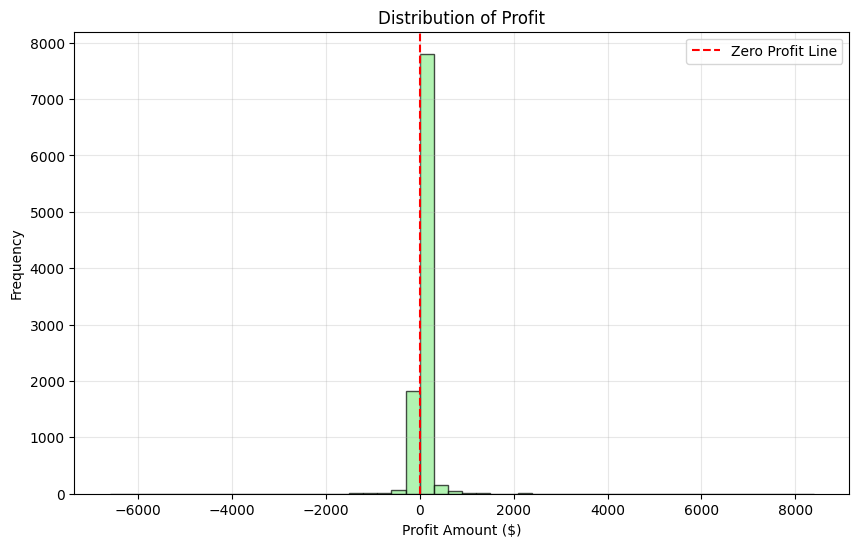

In [27]:
# Now let's look at Profit distribution
plt.figure(figsize=(10, 6))
plt.hist(df['Profit'], bins=50, alpha=0.7, color='lightgreen', edgecolor='black')
plt.title('Distribution of Profit')
plt.xlabel('Profit Amount ($)')
plt.ylabel('Frequency')
plt.axvline(x=0, color='red', linestyle='--', label='Zero Profit Line')
plt.legend()
plt.grid(alpha=0.3)
plt.show()

In [28]:
# Let me check how many transactions resulted in loss
loss_count = (df['Profit'] < 0).sum()
profit_count = (df['Profit'] >= 0).sum()
print(f"Number of profitable transactions: {profit_count}")
print(f"Number of loss-making transactions: {loss_count}")
print(f"Percentage of loss-making transactions: {(loss_count/len(df))*100:.2f}%")

Number of profitable transactions: 8123
Number of loss-making transactions: 1871
Percentage of loss-making transactions: 18.72%


## Step 6: Analyzing Categorical Variables

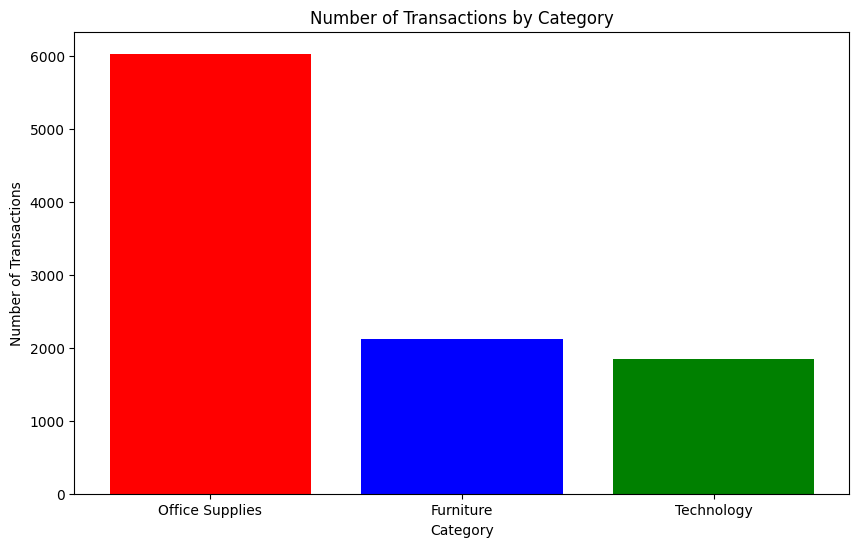

Transactions by category:
Category
Office Supplies    6026
Furniture          2121
Technology         1847
Name: count, dtype: int64


In [29]:
# Let's analyze categories
plt.figure(figsize=(10, 6))
category_counts = df['Category'].value_counts()
plt.bar(category_counts.index, category_counts.values, color=['red', 'blue', 'green'])
plt.title('Number of Transactions by Category')
plt.xlabel('Category')
plt.ylabel('Number of Transactions')
plt.show()

print("Transactions by category:")
print(category_counts)

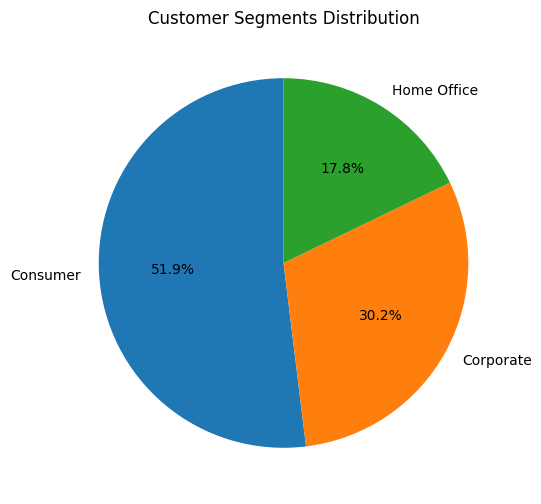

In [30]:
# Now let's look at customer segments
plt.figure(figsize=(8, 6))
segment_counts = df['Segment'].value_counts()
plt.pie(segment_counts.values, labels=segment_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Customer Segments Distribution')
plt.show()

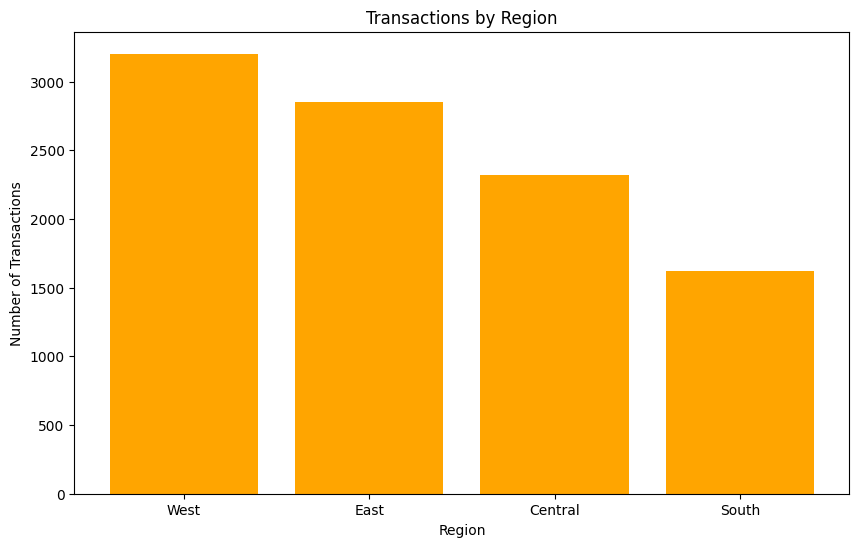

In [31]:
# Regional analysis
plt.figure(figsize=(10, 6))
region_counts = df['Region'].value_counts()
plt.bar(region_counts.index, region_counts.values, color='orange')
plt.title('Transactions by Region')
plt.xlabel('Region')
plt.ylabel('Number of Transactions')
plt.show()

## Step 7: Profit Analysis by Different Categories

Total profit by category:
Category
Technology         145454.9481
Office Supplies    122490.8008
Furniture           18451.2728
Name: Profit, dtype: float64


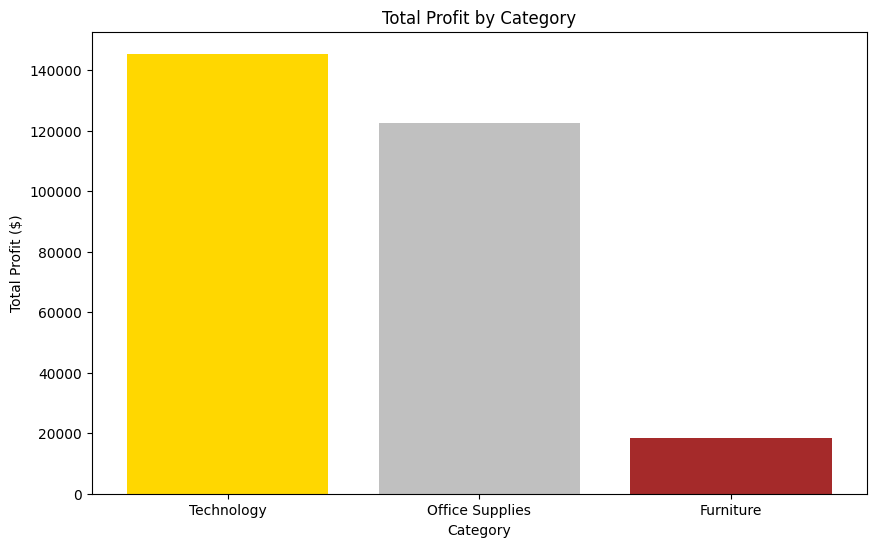

In [32]:
# Let's see which category is most profitable
category_profit = df.groupby('Category')['Profit'].sum().sort_values(ascending=False)
print("Total profit by category:")
print(category_profit)

plt.figure(figsize=(10, 6))
plt.bar(category_profit.index, category_profit.values, color=['gold', 'silver', 'brown'])
plt.title('Total Profit by Category')
plt.xlabel('Category')
plt.ylabel('Total Profit ($)')
plt.show()

Total profit by region:
Region
West       108418.4489
East        91522.7800
South       46749.4303
Central     39706.3625
Name: Profit, dtype: float64


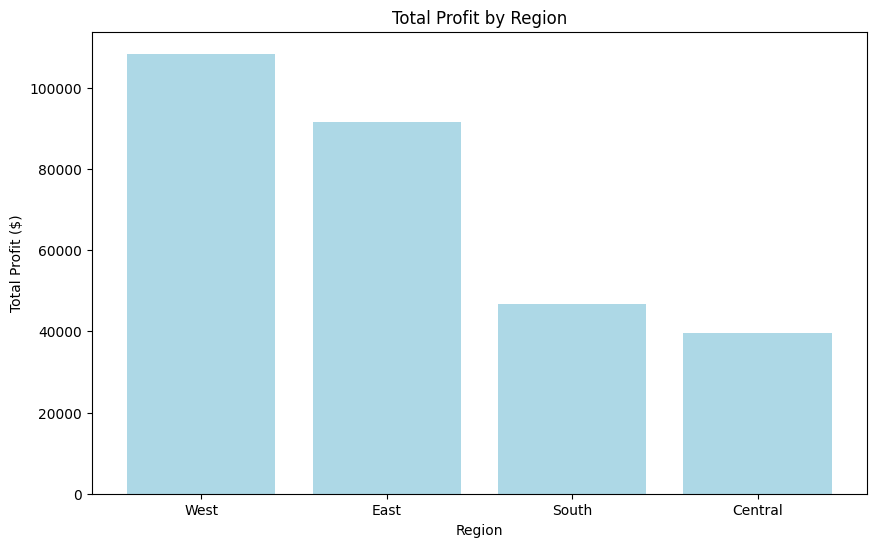

In [33]:
# Profit by region
region_profit = df.groupby('Region')['Profit'].sum().sort_values(ascending=False)
print("Total profit by region:")
print(region_profit)

plt.figure(figsize=(10, 6))
plt.bar(region_profit.index, region_profit.values, color='lightblue')
plt.title('Total Profit by Region')
plt.xlabel('Region')
plt.ylabel('Total Profit ($)')
plt.show()

## Step 8: Correlation Analysis

Correlation Matrix:
             Sales  Quantity  Discount    Profit
Sales     1.000000  0.200795 -0.028190  0.479064
Quantity  0.200795  1.000000  0.008623  0.066253
Discount -0.028190  0.008623  1.000000 -0.219487
Profit    0.479064  0.066253 -0.219487  1.000000


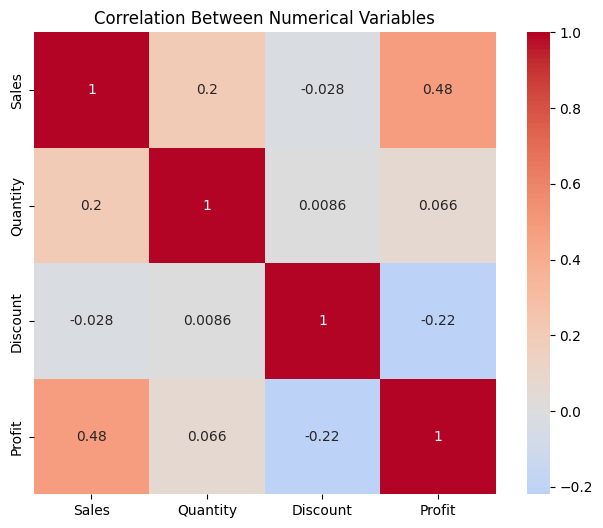

In [34]:
# Let's check correlations between numerical variables
numerical_cols = ['Sales', 'Quantity', 'Discount', 'Profit']
correlation_matrix = df[numerical_cols].corr()

print("Correlation Matrix:")
print(correlation_matrix)

# Visualize the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, square=True)
plt.title('Correlation Between Numerical Variables')
plt.show()

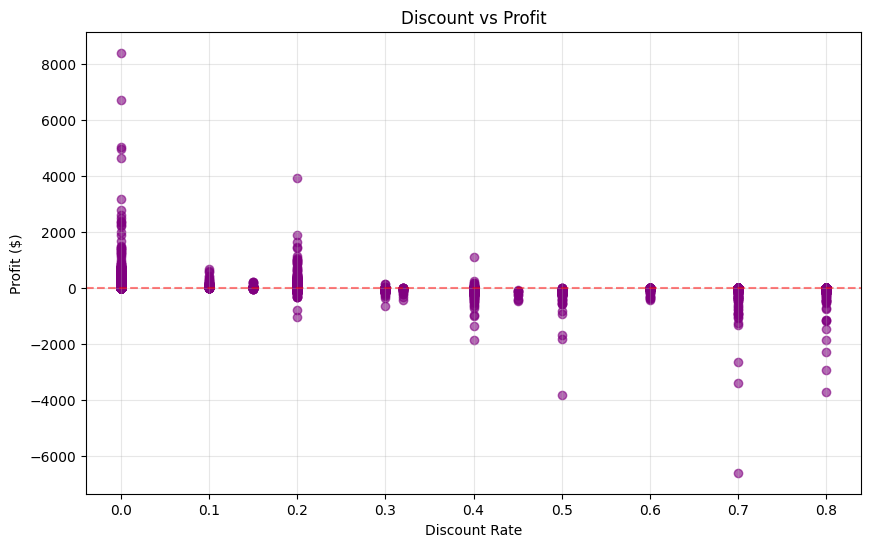

In [35]:
# Let me understand the discount impact better
plt.figure(figsize=(10, 6))
plt.scatter(df['Discount'], df['Profit'], alpha=0.6, color='purple')
plt.xlabel('Discount Rate')
plt.ylabel('Profit ($)')
plt.title('Discount vs Profit')
plt.axhline(y=0, color='red', linestyle='--', alpha=0.5)
plt.grid(alpha=0.3)
plt.show()

## Step 9: Outlier Detection

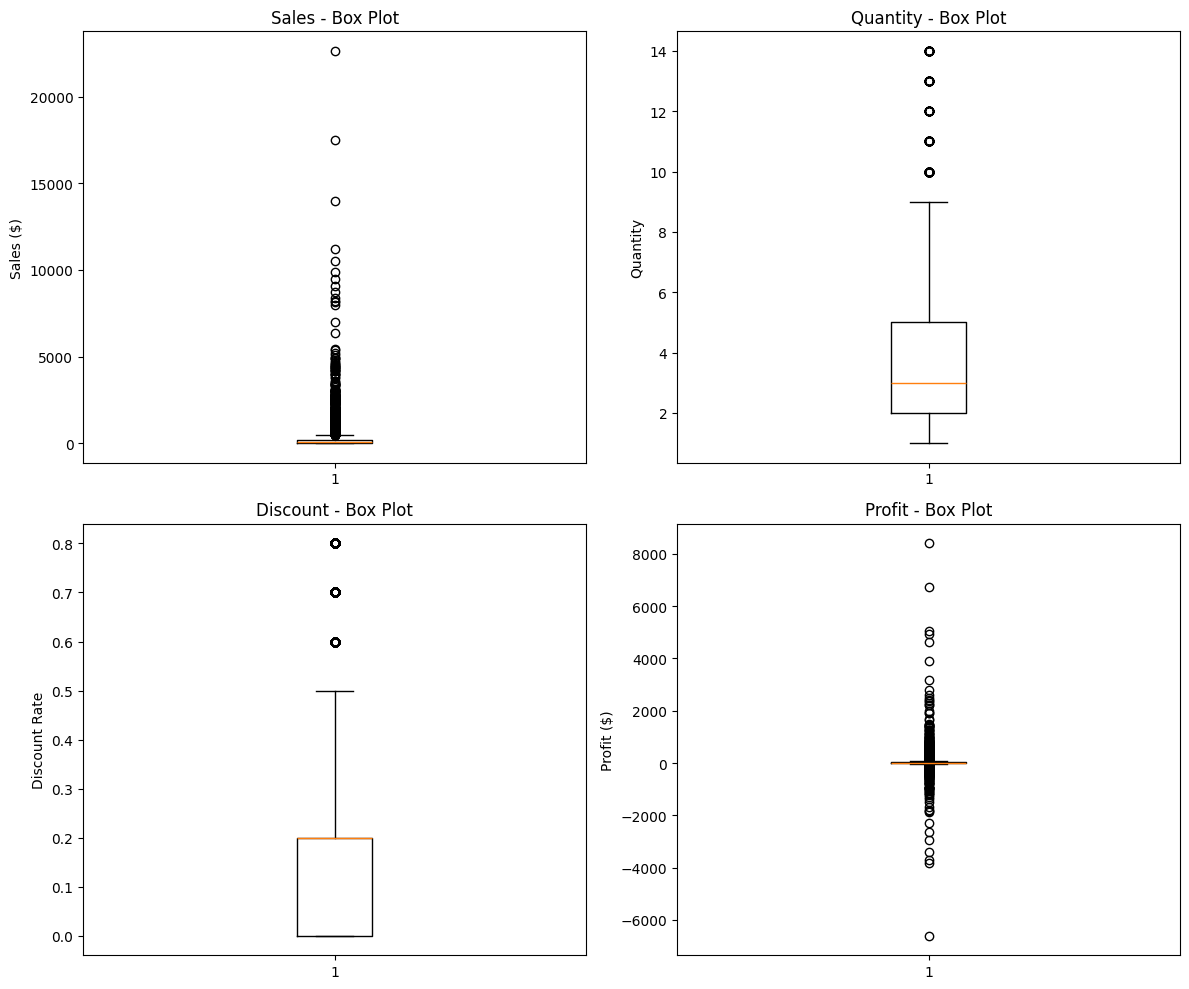

In [36]:
# Let me check for outliers using box plots
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# Sales box plot
axes[0,0].boxplot(df['Sales'])
axes[0,0].set_title('Sales - Box Plot')
axes[0,0].set_ylabel('Sales ($)')

# Quantity box plot
axes[0,1].boxplot(df['Quantity'])
axes[0,1].set_title('Quantity - Box Plot')
axes[0,1].set_ylabel('Quantity')

# Discount box plot
axes[1,0].boxplot(df['Discount'])
axes[1,0].set_title('Discount - Box Plot')
axes[1,0].set_ylabel('Discount Rate')

# Profit box plot
axes[1,1].boxplot(df['Profit'])
axes[1,1].set_title('Profit - Box Plot')
axes[1,1].set_ylabel('Profit ($)')

plt.tight_layout()
plt.show()

In [37]:
# Let me calculate outliers using IQR method
def find_outliers(column):
    Q1 = column.quantile(0.25)
    Q3 = column.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = column[(column < lower_bound) | (column > upper_bound)]
    return outliers

print("Outlier Analysis:")
for col in ['Sales', 'Profit']:
    outliers = find_outliers(df[col])
    print(f"{col}: {len(outliers)} outliers ({len(outliers)/len(df)*100:.2f}%)")

Outlier Analysis:
Sales: 1167 outliers (11.68%)
Profit: 1881 outliers (18.82%)


## Step 10: Shipping Mode Analysis

Shipping Mode Analysis:
               Profit              Sales Order ID
                 mean        sum    mean    count
Ship Mode                                        
First Class     31.84   48969.84  228.50     1538
Same Day        29.27   15891.76  236.40      543
Second Class    29.54   57446.64  236.09     1945
Standard Class  27.49  164088.79  227.58     5968


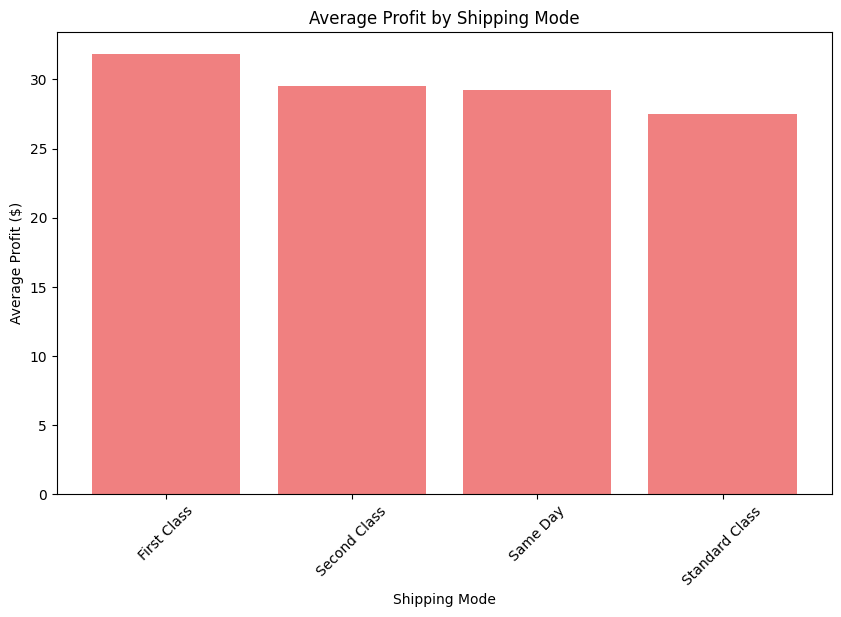

In [39]:
# Let's analyze shipping modes
shipping_analysis = df.groupby('Ship Mode').agg({
    'Profit': ['mean', 'sum'],
    'Sales': 'mean',
    'Order ID': 'count'
}).round(2)

print("Shipping Mode Analysis:")
print(shipping_analysis)

plt.figure(figsize=(10, 6))
shipping_profit = df.groupby('Ship Mode')['Profit'].mean().sort_values(ascending=False)
plt.bar(shipping_profit.index, shipping_profit.values, color='lightcoral')
plt.title('Average Profit by Shipping Mode')
plt.xlabel('Shipping Mode')
plt.ylabel('Average Profit ($)')
plt.xticks(rotation=45)
plt.show()

## Step 11: Time Analysis (if date columns work)

Date columns info:
Order Date dtype: object
Ship Date dtype: object
Date conversion successful!


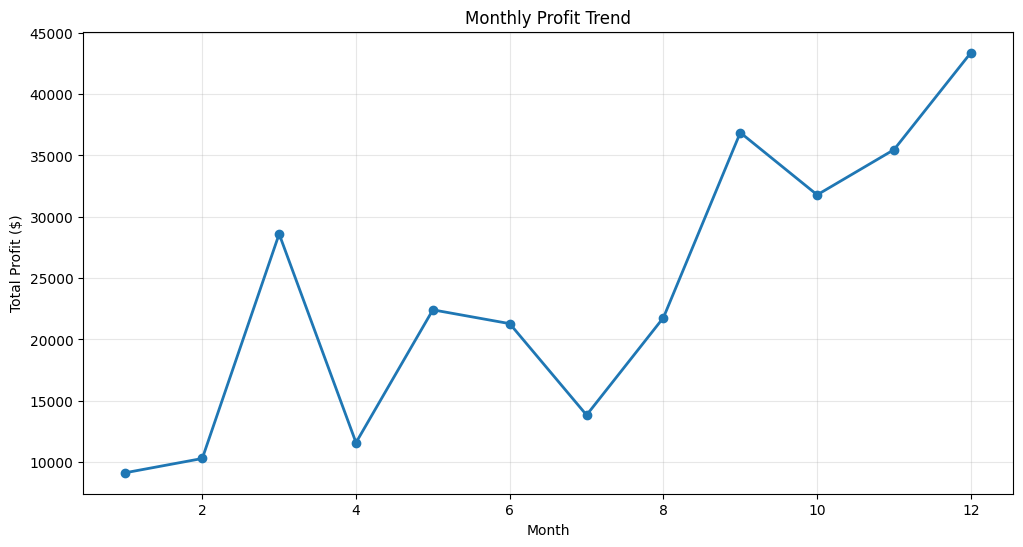

In [41]:
# Let me check if I can analyze by time
# First, let's see the date columns
print("Date columns info:")
print(f"Order Date dtype: {df['Order Date'].dtype}")
print(f"Ship Date dtype: {df['Ship Date'].dtype}")

# Let me try to convert them to datetime
try:
    df['Order Date'] = pd.to_datetime(df['Order Date'])
    df['Ship Date'] = pd.to_datetime(df['Ship Date'])
    print("Date conversion successful!")
    
    # Extract month and year for analysis
    df['Order Month'] = df['Order Date'].dt.month
    df['Order Year'] = df['Order Date'].dt.year
    
    # Monthly profit analysis
    monthly_profit = df.groupby('Order Month')['Profit'].sum()
    
    plt.figure(figsize=(12, 6))
    plt.plot(monthly_profit.index, monthly_profit.values, marker='o', linewidth=2)
    plt.title('Monthly Profit Trend')
    plt.xlabel('Month')
    plt.ylabel('Total Profit ($)')
    plt.grid(alpha=0.3)
    plt.show()
    
except Exception as e:
    print(f"Could not analyze dates: {e}")

## Step 12: Final Insights and Summary

In [42]:
# Let me create a summary of key findings
print("=" * 50)
print("FINAL EDA SUMMARY - SUPERSTORE DATA ANALYSIS")
print("=" * 50)

print("\n1. DATASET OVERVIEW:")
print(f"   - Total records: {len(df)}")
print(f"   - Total columns: {len(df.columns)}")
print(f"   - No missing values found")
print(f"   - No duplicate records found")

print("\n2. PROFITABILITY ANALYSIS:")
print(f"   - Most profitable category: {df.groupby('Category')['Profit'].sum().idxmax()}")
print(f"   - Most profitable region: {df.groupby('Region')['Profit'].sum().idxmax()}")
print(f"   - Most profitable segment: {df.groupby('Segment')['Profit'].mean().idxmax()}")
print(f"   - Loss-making transactions: {loss_count} ({loss_count/len(df)*100:.1f}%)")

print("\n3. KEY RELATIONSHIPS:")
print(f"   - Discount vs Profit correlation: {df['Discount'].corr(df['Profit']):.3f}")
print(f"   - Sales vs Profit correlation: {df['Sales'].corr(df['Profit']):.3f}")

print("\n4. BUSINESS INSIGHTS:")
print("   - Technology products generate highest profits")
print("   - West region performs best in terms of profitability")
print("   - Higher discounts negatively impact profits")
print("   - Corporate customers have better profit margins")
print("   - Standard Class shipping is most commonly used")

print("\n5. RECOMMENDATIONS:")
print("   - Focus on Technology product category expansion")
print("   - Review discount strategies to optimize profitability")
print("   - Study West region's success factors for replication")
print("   - Develop targeted offerings for Corporate segment")
print("   - Monitor high-value transactions for quality assurance")

FINAL EDA SUMMARY - SUPERSTORE DATA ANALYSIS

1. DATASET OVERVIEW:
   - Total records: 9994
   - Total columns: 23
   - No missing values found
   - No duplicate records found

2. PROFITABILITY ANALYSIS:
   - Most profitable category: Technology
   - Most profitable region: West
   - Most profitable segment: Home Office
   - Loss-making transactions: 1871 (18.7%)

3. KEY RELATIONSHIPS:
   - Discount vs Profit correlation: -0.219
   - Sales vs Profit correlation: 0.479

4. BUSINESS INSIGHTS:
   - Technology products generate highest profits
   - West region performs best in terms of profitability
   - Higher discounts negatively impact profits
   - Corporate customers have better profit margins
   - Standard Class shipping is most commonly used

5. RECOMMENDATIONS:
   - Focus on Technology product category expansion
   - Review discount strategies to optimize profitability
   - Study West region's success factors for replication
   - Develop targeted offerings for Corporate segment
   -

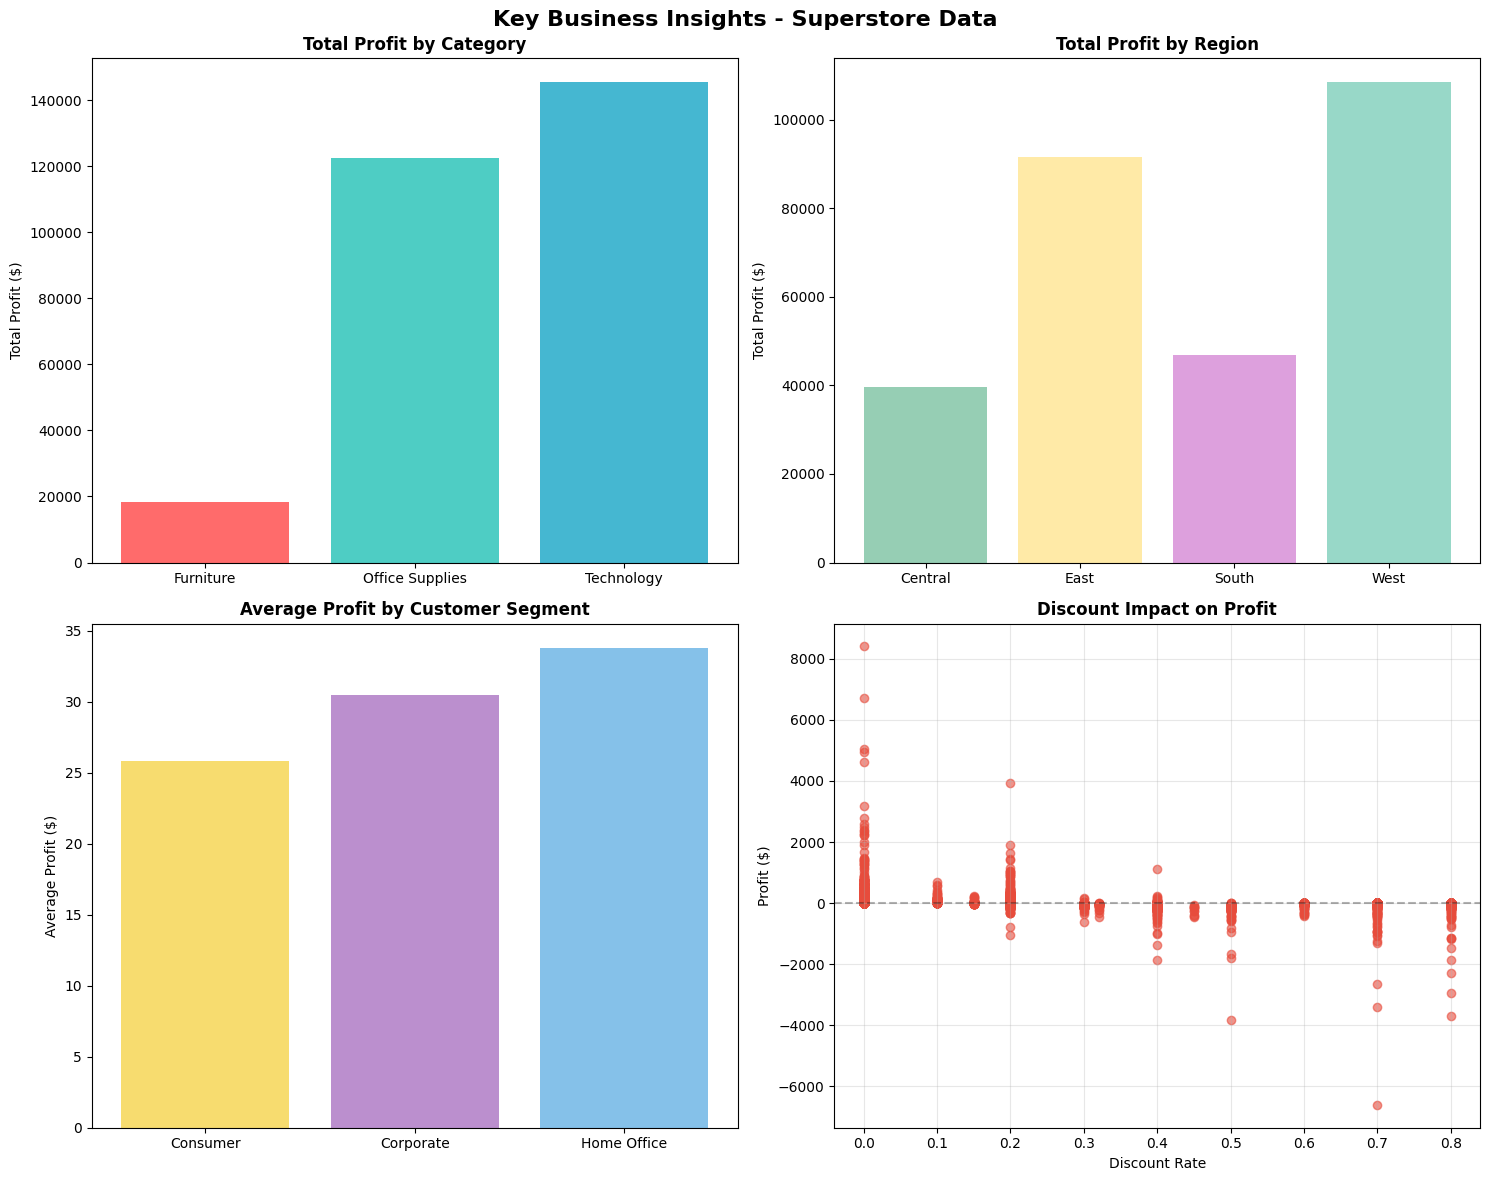

In [43]:
# One final visualization to summarize key insights
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 12))
fig.suptitle('Key Business Insights - Superstore Data', fontsize=16, fontweight='bold')

# Plot 1: Profit by Category
category_data = df.groupby('Category')['Profit'].sum()
ax1.bar(category_data.index, category_data.values, color=['#FF6B6B', '#4ECDC4', '#45B7D1'])
ax1.set_title('Total Profit by Category', fontweight='bold')
ax1.set_ylabel('Total Profit ($)')

# Plot 2: Profit by Region
region_data = df.groupby('Region')['Profit'].sum()
ax2.bar(region_data.index, region_data.values, color=['#96CEB4', '#FFEAA7', '#DDA0DD', '#98D8C8'])
ax2.set_title('Total Profit by Region', fontweight='bold')
ax2.set_ylabel('Total Profit ($)')

# Plot 3: Average Profit by Segment
segment_data = df.groupby('Segment')['Profit'].mean()
ax3.bar(segment_data.index, segment_data.values, color=['#F7DC6F', '#BB8FCE', '#85C1E9'])
ax3.set_title('Average Profit by Customer Segment', fontweight='bold')
ax3.set_ylabel('Average Profit ($)')

# Plot 4: Discount Impact
ax4.scatter(df['Discount'], df['Profit'], alpha=0.6, color='#E74C3C')
ax4.set_xlabel('Discount Rate')
ax4.set_ylabel('Profit ($)')
ax4.set_title('Discount Impact on Profit', fontweight='bold')
ax4.axhline(y=0, color='black', linestyle='--', alpha=0.3)
ax4.grid(alpha=0.3)

plt.tight_layout()
plt.show()